# Does gelatine make PVA degrade faster?

Data visualisation and statistical analysis will be perfomed to determine whether gelatine leads to PVA degradation.

## Loading data and creating data frames

In [64]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [65]:
#Create a dataframe from the data set

df = pd.read_excel('Dataset_3.xlsx')
df.head(25)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,* Does gelatin make PVA degrade faster?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,PVA- gelatin,NaN,NaN,NaN,NaN,PVA,NaN,NaN
5,%,Repeat 1,Repeat 2,Repeat 3,NaN,%,Repeat 1,Repeat 2,Repeat 3
6,Day 1,10.769413,4.855374,4.871488,NaN,Day 1,25.371281,14.794058,19.042696
7,NaN,8.797466,5.982802,7.073099,NaN,NaN,28.945981,17.992369,22.529734
8,NaN,8.947023,5.548924,6.63525,NaN,NaN,26.092739,15.469808,20.39367
9,Day 3,6.930871,6.539349,4.044672,NaN,Day 3,20.954005,14.913161,20.436355


In [66]:
#Rearranging the dataframe

df = df.drop([0, 1, 2, 3, 4, 5])
df = df.drop(df.columns[4], axis=1)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696
7,NaN,8.797466,5.982802,7.073099,NaN,28.945981,17.992369,22.529734
8,NaN,8.947023,5.548924,6.63525,NaN,26.092739,15.469808,20.39367
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355
10,NaN,7.19341,7.785491,4.923465,NaN,21.697067,18.799576,22.264545


In [67]:
df = df.rename({'Unnamed: 0': 'Day', 'Unnamed: 1': 'Repeat 1.G', 'Unnamed: 2': 'Repeat 2.G', 'Unnamed: 3': 'Repeat 3.G', 'Unnamed: 5': 'Day', 'Unnamed: 6': 'Repeat 1', 'Unnamed: 7': 'Repeat 2', 'Unnamed: 8': 'Repeat 3'}, axis=1)
df.head()

,Day,Repeat 1.G,Repeat 2.G,Repeat 3.G,Day,Repeat 1,Repeat 2,Repeat 3
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696
7,NaN,8.797466,5.982802,7.073099,NaN,28.945981,17.992369,22.529734
8,NaN,8.947023,5.548924,6.63525,NaN,26.092739,15.469808,20.39367
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355
10,NaN,7.19341,7.785491,4.923465,NaN,21.697067,18.799576,22.264545


In [68]:
#Adding new column for the average of each sample across three repeats in the PVA with gelatine group

df['avg_g'] = df[['Repeat 1.G', 'Repeat 2.G', 'Repeat 3.G']].mean(axis=1)
df.head()

,Day,Repeat 1.G,Repeat 2.G,Repeat 3.G,Day,Repeat 1,Repeat 2,Repeat 3,avg_g
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696,6.832092
7,NaN,8.797466,5.982802,7.073099,NaN,28.945981,17.992369,22.529734,7.284456
8,NaN,8.947023,5.548924,6.63525,NaN,26.092739,15.469808,20.39367,7.043733
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355,5.838298
10,NaN,7.19341,7.785491,4.923465,NaN,21.697067,18.799576,22.264545,6.634122


Adding new columns to the dataframe that will allow me to plot and analyse the data:

In [69]:
#Adding new column for the average of each sample across three repeats in the PVA without gelatine group

df['avg'] = df[['Repeat 1', 'Repeat 2', 'Repeat 3']].mean(axis=1)
df.head()

,Day,Repeat 1.G,Repeat 2.G,Repeat 3.G,Day,Repeat 1,Repeat 2,Repeat 3,avg_g,avg
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696,6.832092,19.736012
7,NaN,8.797466,5.982802,7.073099,NaN,28.945981,17.992369,22.529734,7.284456,23.156028
8,NaN,8.947023,5.548924,6.63525,NaN,26.092739,15.469808,20.39367,7.043733,20.652072
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355,5.838298,18.767840
10,NaN,7.19341,7.785491,4.923465,NaN,21.697067,18.799576,22.264545,6.634122,20.920396


In [91]:
#Creating a column with the difference between the average of each group

df['diff'] = df['avg'] - df['avg_g']
df.head()

,Day,Repeat 1.G,Repeat 2.G,Repeat 3.G,Day,Repeat 1,Repeat 2,Repeat 3,avg_g,avg,diff,days
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696,6.832092,19.736012,12.903920,1
7,,8.797466,5.982802,7.073099,,28.945981,17.992369,22.529734,7.284456,23.156028,15.871572,1
8,,8.947023,5.548924,6.635250,,26.092739,15.469808,20.393670,7.043733,20.652072,13.608340,1
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355,5.838298,18.767840,12.929543,3
10,,7.193410,7.785491,4.923465,,21.697067,18.799576,22.264545,6.634122,20.920396,14.286274,3


In [71]:
df['days'] = [1, 1, 1,
             3, 3, 3,
             7, 7, 7,
             10, 10, 10,
             14, 14, 14,
             21, 21, 21, 
             28, 28, 28] 

In [117]:
#Remove NaN values

df = df.fillna('')
df.head(21)

,Day,Repeat 1.G,Repeat 2.G,Repeat 3.G,Day,Repeat 1,Repeat 2,Repeat 3,avg_g,avg,diff,days
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696,6.832092,19.736012,12.903920,1
7,,8.797466,5.982802,7.073099,,28.945981,17.992369,22.529734,7.284456,23.156028,15.871572,1
8,,8.947023,5.548924,6.635250,,26.092739,15.469808,20.393670,7.043733,20.652072,13.608340,1
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355,5.838298,18.767840,12.929543,3
10,,7.193410,7.785491,4.923465,,21.697067,18.799576,22.264545,6.634122,20.920396,14.286274,3
11,,10.196613,4.126606,7.699192,,25.040578,18.321610,23.383041,7.340804,22.248410,14.907606,3
12,Day 7,9.344181,4.920430,8.406278,Day 7,27.065203,25.247595,25.317270,7.556963,25.876689,18.319726,7
13,,8.089227,7.312273,8.374282,,24.527381,23.047634,27.299523,7.925261,24.958180,17.032919,7
14,,6.999106,6.123969,10.388054,,28.739428,17.417131,25.462379,7.837043,23.872979,16.035936,7
15,Day 10,9.701697,9.961237,10.664634,Day 10,22.535092,19.391415,27.770710,10.109189,23.232406,13.123216,10


## Data Visualisation

Text(0.5, 1.0, 'PVA Repeat 3')

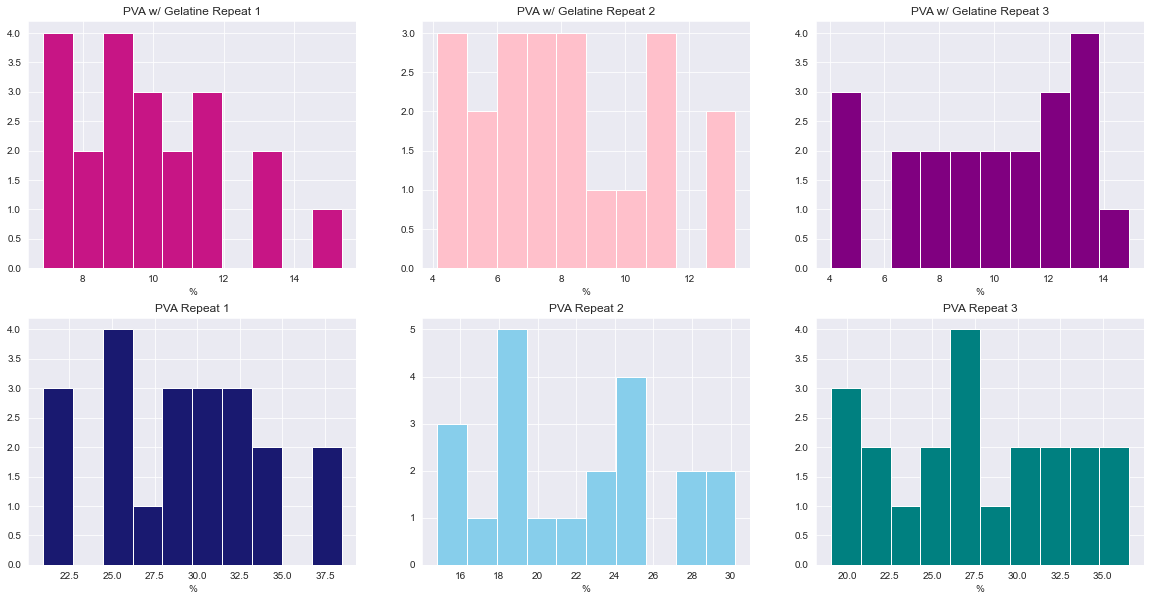

In [124]:
#Create a subplot with histograms for each repeat in each of the data sets

plt.figure (figsize=(20,10))

plt.subplot(231)
df['Repeat 1.G'].hist(bins = 10, color = 'mediumvioletred')
plt.ylabel('')
plt.xlabel('%')
plt.title('PVA w/ Gelatine Repeat 1')

plt.subplot(232)
df['Repeat 2.G'].hist(bins = 10, color = 'pink')
plt.ylabel('')
plt.xlabel('%')
plt.title('PVA w/ Gelatine Repeat 2')

plt.subplot(233)
df['Repeat 3.G'].hist(bins = 10, color = 'purple')
plt.ylabel('')
plt.xlabel('%')
plt.title('PVA w/ Gelatine Repeat 3')

plt.subplot(234)
df['Repeat 1'].hist(bins = 10, color = 'midnightblue')
plt.ylabel('')
plt.xlabel('%')
plt.title('PVA Repeat 1')

plt.subplot(235)
df['Repeat 2'].hist(bins = 10, color = 'skyblue')
plt.ylabel('')
plt.xlabel('%')
plt.title('PVA Repeat 2')

plt.subplot(236)
df['Repeat 3'].hist(bins = 10, color = 'teal')
plt.ylabel('')
plt.xlabel('%')
plt.title('PVA Repeat 3')

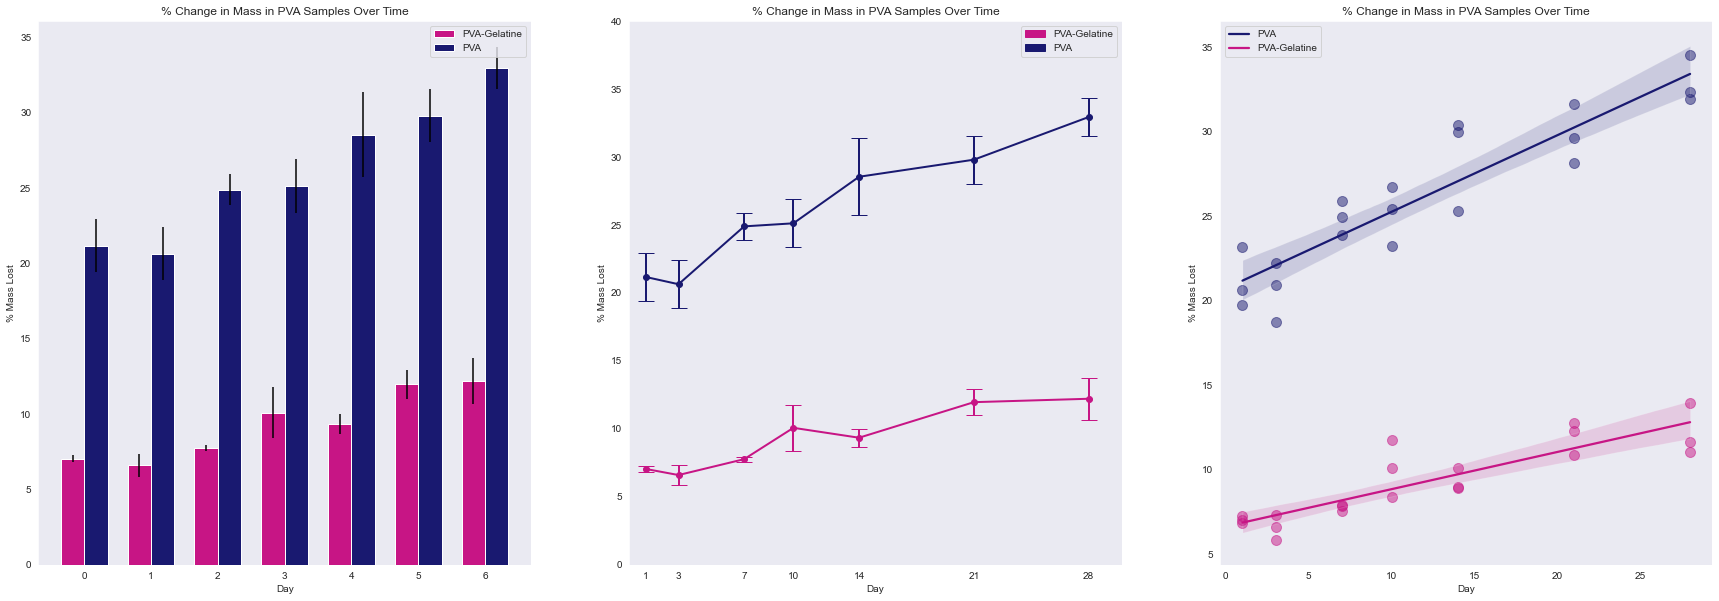

In [118]:
# Set up main plot
main_fig, main_axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# PLOT 1: Grouped barplot showing % Change in Mass in PVA with or without Gelatine
labels = ['1', '3', '7', '10', '14', '21', '28']
avg_w_g = [df.loc[6:8, 'avg_g'].mean(), df.loc[9:11, 'avg_g'].mean(), df.loc[12:14, 'avg_g'].mean(),
           df.loc[15:17, 'avg_g'].mean(), df.loc[18:20, 'avg_g'].mean(), df.loc[21:23, 'avg_g'].mean(),
           df.loc[24:26, 'avg_g'].mean()]
avg_wo_g = [df.loc[6:8, 'avg'].mean(), df.loc[9:11, 'avg'].mean(), df.loc[12:14, 'avg'].mean(),
           df.loc[15:17, 'avg'].mean(), df.loc[18:20, 'avg'].mean(), df.loc[21:23, 'avg'].mean(),
           df.loc[24:26, 'avg'].mean()]
error1 = [df.loc[6:8, 'avg_g'].std(), df.loc[9:11, 'avg_g'].std(), df.loc[12:14, 'avg_g'].std(),
           df.loc[15:17, 'avg_g'].std(), df.loc[18:20, 'avg_g'].std(), df.loc[21:23, 'avg_g'].std(),
           df.loc[24:26, 'avg_g'].std()]
error2 = [df.loc[6:8, 'avg'].std(), df.loc[9:11, 'avg'].std(), df.loc[12:14, 'avg'].std(),
           df.loc[15:17, 'avg'].std(), df.loc[18:20, 'avg'].std(), df.loc[21:23, 'avg'].std(),
           df.loc[24:26, 'avg'].std()]

x = np.arange(len(labels))  
width = 0.35 

main_axes[0].bar(x - width/2, avg_w_g, width, color = 'mediumvioletred', ecolor = 'black', yerr = error1, label='PVA-Gelatine')
main_axes[0].bar(x + width/2, avg_wo_g, width, color = 'midnightblue', ecolor = 'black', yerr = error2, label='PVA')
main_axes[0].set_title('% Change in Mass in PVA Samples Over Time')
main_axes[0].set_ylabel('% Mass Lost')
main_axes[0].set_xlabel('Day')
main_axes[0].legend()


# PLOT 2: Errorbar plot showing % Change in Mass in PVA with or without Gelatine
x = [1, 3, 7, 10, 14, 21, 28]

main_axes[1].errorbar(x, avg_w_g, error1, marker = 'o', color = 'mediumvioletred', ecolor = 'mediumvioletred', linewidth = 2.0, capsize = 8.0)
main_axes[1].errorbar(x, avg_wo_g, error2, marker = 'o', color = 'midnightblue', ecolor = 'midnightblue', linewidth = 2.0, capsize = 8.0)
main_axes[1].set_ylabel('% Mass Lost')
main_axes[1].set_xlabel('Day')
PVA_G_legend = mpatches.Patch(color='mediumvioletred', label='PVA-Gelatine')
PVA_legend = mpatches.Patch(color='midnightblue', label='PVA')
main_axes[1].legend(handles=[PVA_G_legend, PVA_legend])
PVA_legend = mpatches.Patch(color='midnightblue', label='PVA')
main_axes[1].axis([0, 30, 0, 40])
main_axes[1].set_xticks([1, 3, 7, 10, 14, 21, 28])
main_axes[1].set_title('% Change in Mass in PVA Samples Over Time')


# PLOT 3: Scatter plot showing % Change in Mass in PVA with or without Gelatine
df['days'] = [1, 1, 1,
             3, 3, 3,
             7, 7, 7,
             10, 10, 10,
             14, 14, 14,
             21, 21, 21, 
             28, 28, 28] 
ax = sns.regplot(x = df.days, y = df.avg, data = df,
           scatter_kws = {'s': 100, 'alpha': 0.5, 'color': 'midnightblue'},
           line_kws = {'color': 'midnightblue'})
ax1 = sns.regplot(x = df.days, y = df.avg_g, data = df,
           scatter_kws = {'s': 100, 'alpha': 0.5, 'color': 'mediumvioletred'},
           line_kws = {'color': 'mediumvioletred'})

ax.set(xlabel = 'Day', ylabel = '% Mass Lost', label = 'PVA')
ax1.set(xlabel = 'Day', ylabel = '% Mass Lost')
ax.legend(labels = ['PVA', 'PVA-Gelatine'])

main_axes[2].set_title('% Change in Mass in PVA Samples Over Time')

plt.show()

Subplot showing a grouped barplot (left), errorbar plot(middle), and scatterplot (right) of the means of the PVA-Gelatine and PVA % of mass lost over time.

### Comments on the Data

From the visualisation of this data we can deduce that in both the PVA-Gelatine and PVA groups there is an increasing change in mass over time compared to the original mass. In the PVA group, the mean % mass lost starts at a higher value, and there is a steeper change over time, suggesting this occurs at a faster rate than in the PVA-Gelatine group.
This can be seen in the group plot which shows a barplot, errorbar plot, and scatter plot. These plots took the average % mass at each day in which recordings were taken, and showed how they changed over time. We can see in all three plots that the PVA only group start at a higher %, and increase more over time. There are also larger standard error and confidence intervals for the PVA group, suggesting there is more variation around the mean.
The PVA-Gelatine group also shows an increasing % mass over time, but at a much slower rate and it begins at a much lower value. In this group the % of mass lost appears to be levelling off, whereas the PVA % mass lost is still increasing steeply. In order to see whether this is the case, more recordings would need to be taken past 26 days.

## Statistical Analysis

#### Descriptive Statistics

In [109]:
df.describe()

,Repeat 1.G,Repeat 2.G,Repeat 3.G,Repeat 1,Repeat 2,Repeat 3,avg_g,avg,diff,days
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,9.924668,8.147770,9.804508,29.109794,21.894831,27.497701,9.292316,26.167442,16.875126,12.000000
std,2.274724,2.646808,3.139033,4.854251,4.825270,5.136530,2.314586,4.560426,2.865594,9.262829
min,6.879875,4.126606,4.044672,20.954005,14.794058,19.042696,5.838298,18.767840,12.903920,1.000000
25%,8.516274,6.123969,7.699192,25.371281,17.992369,23.383041,7.340804,23.156028,14.286274,3.000000
50%,9.701697,7.785491,10.388054,28.957012,21.901141,27.299523,8.946226,25.399968,16.875740,10.000000
75%,11.258564,9.961237,12.628708,32.762886,25.247595,31.386528,11.078155,29.996640,19.371257,21.000000
max,15.345340,13.433988,14.934339,38.468802,30.245993,36.562113,13.960972,34.556703,21.422758,28.000000


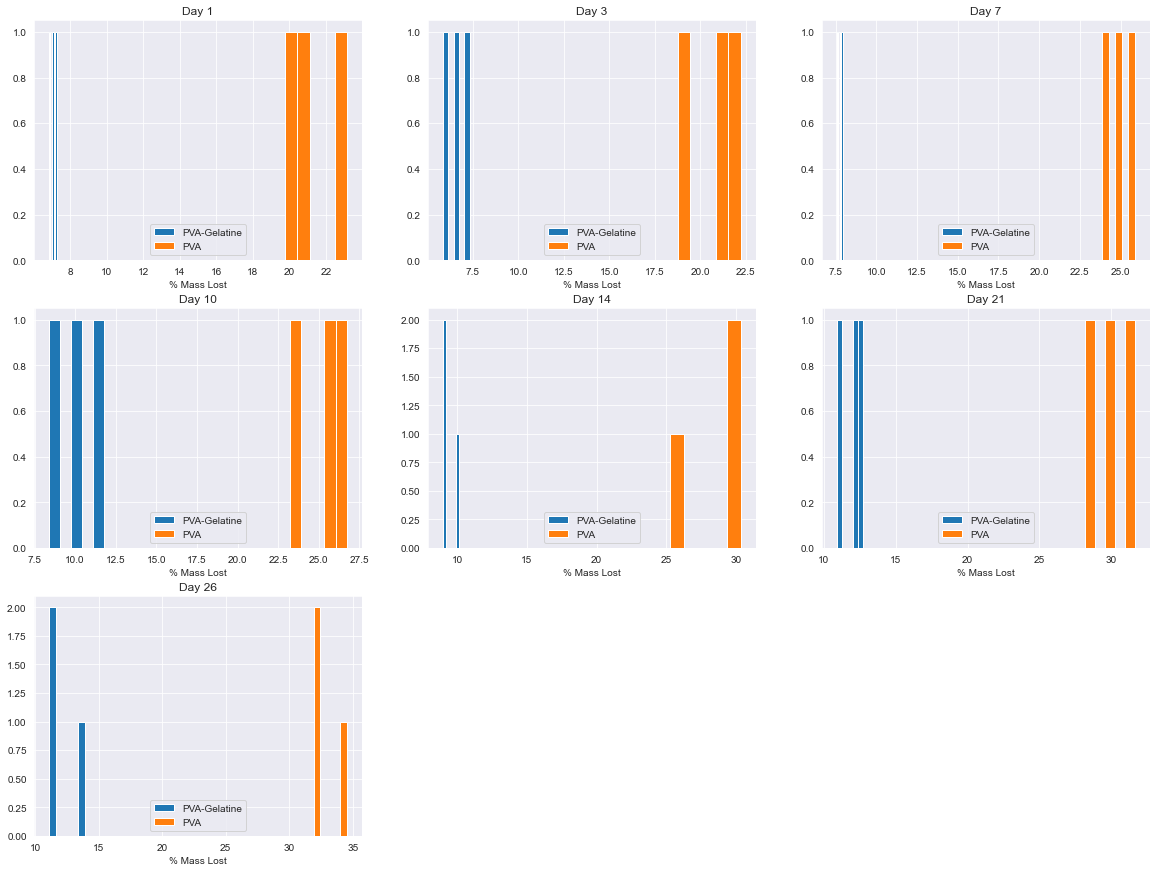

In [120]:
#PVA and PVA-gelatine sample histograms

plt.figure(figsize = (20,15))
plt.subplot(331)
df.loc[6:8, 'avg_g'].hist(bins = 5)
df.loc[6:8, 'avg'].hist(bins = 5)
plt.xlabel('% Mass Lost')
plt.title('Day 1')
plt.legend(['PVA-Gelatine', 'PVA'])

plt.subplot(332)
df.loc[9:11, 'avg_g'].hist(bins = 5)
df.loc[9:11, 'avg'].hist(bins = 5)
plt.xlabel('% Mass Lost')
plt.title('Day 3')
plt.legend(['PVA-Gelatine', 'PVA'])

plt.subplot(333)
df.loc[12:14, 'avg_g'].hist(bins = 5)
df.loc[12:14, 'avg'].hist(bins = 5)
plt.xlabel('% Mass Lost')
plt.title('Day 7')
plt.legend(['PVA-Gelatine', 'PVA'])

plt.subplot(334)
df.loc[15:17, 'avg_g'].hist(bins = 5)
df.loc[15:17, 'avg'].hist(bins = 5)
plt.xlabel('% Mass Lost')
plt.title('Day 10')
plt.legend(['PVA-Gelatine', 'PVA'])

plt.subplot(335)
df.loc[18:20, 'avg_g'].hist(bins = 5)
df.loc[18:20, 'avg'].hist(bins = 5)
plt.xlabel('% Mass Lost')
plt.title('Day 14')
plt.legend(['PVA-Gelatine', 'PVA'])

plt.subplot(336)
df.loc[21:23, 'avg_g'].hist(bins = 5)
df.loc[21:23, 'avg'].hist(bins = 5)
plt.xlabel('% Mass Lost')
plt.title('Day 21')
plt.legend(['PVA-Gelatine', 'PVA'])

plt.subplot(337)
df.loc[24:26, 'avg_g'].hist(bins = 5)
df.loc[24:26, 'avg'].hist(bins = 5)
plt.xlabel('% Mass Lost')
plt.title('Day 26')
plt.legend(['PVA-Gelatine', 'PVA'])

From the histograms the data does not appear to be normalised.

Data does not appear to be normal, further analysis required


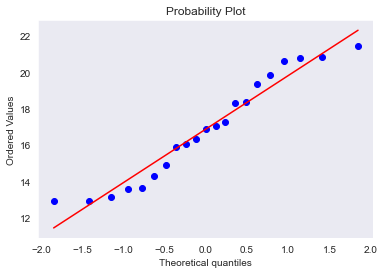

In [80]:
stats.probplot(df['diff'], plot = plt)

print('Data does not appear to be normal, further analysis required')

In [123]:
#Test for normal distribution

print('Shapiro Tests:\n')

print('PVA-Gelatine sample:', stats.shapiro(df['avg_g']))
print('PVA sample:', stats.shapiro(df['avg']))

Shapiro Tests:

PVA-Gelatine sample: ShapiroResult(statistic=0.9454784393310547, pvalue=0.2790336608886719)
PVA sample: ShapiroResult(statistic=0.9654810428619385, pvalue=0.6324555277824402)


The Shapiro-Wilk tests show that all data is normally distributed as the p-value > 0.05, so we can analyze the data and see if there is any significant difference using (α = 0.05)

#### Inferential Statistics

In [105]:
#Carry out independent t-test on the averages of the two groups (with or without gelatine)

statistics, p_value = stats.ttest_ind(df['avg_g'], df['avg'])

if (p_value < 0.05):
    print('pvalue = '+str(p_value)+' < 0.05 --> H0 can be rejected - Data seems to be significantly different')
else:
    print('H0 can not be rejected - a significant difference can not be deduced')

pvalue = 3.881792713049693e-18 < 0.05 --> H0 can be rejected - Data seems to be significantly different


In [108]:
stats.mannwhitneyu(df['avg_g'], df['avg'])

MannwhitneyuResult(statistic=0.0, pvalue=3.125399998400872e-08)

The Mann-Whitney test needs more samples, but still shows significance between the two samples (p < 0.05).

In [122]:
#Then carry out independent t-tests to calculate the significance between the PVA samples with and without gelatine on each day

print('Day 1 PVA-Gelatine to PVA:', stats.ttest_ind(df.loc[6:8, 'avg_g'], df.loc[6:8, 'avg']))
print('Day 3 PVA-Gelatine to PVA:', stats.ttest_ind(df.loc[9:11, 'avg_g'], df.loc[9:11, 'avg']))
print('Day 7 PVA-Gelatine to PVA:', stats.ttest_ind(df.loc[12:14, 'avg_g'], df.loc[12:14, 'avg']))
print('Day 10 PVA-Gelatine to PVA:', stats.ttest_ind(df.loc[15:17, 'avg_g'], df.loc[15:17, 'avg']))
print('Day 14 PVA-Gelatine to PVA:', stats.ttest_ind(df.loc[18:20, 'avg_g'], df.loc[18:20, 'avg']))
print('Day 21 PVA-Gelatine to PVA:', stats.ttest_ind(df.loc[21:23, 'avg_g'], df.loc[21:23, 'avg']))
print('Day 26 PVA-Gelatine to PVA:', stats.ttest_ind(df.loc[24:26, 'avg_g'], df.loc[24:26, 'avg']))

Day 1 PVA-Gelatine to PVA: Ttest_indResult(statistic=-13.710477294114273, pvalue=0.00016394322246602363)
Day 3 PVA-Gelatine to PVA: Ttest_indResult(statistic=-12.729148397951144, pvalue=0.00021942853941898702)
Day 7 PVA-Gelatine to PVA: Ttest_indResult(statistic=-29.051084283031148, pvalue=8.357551193499768e-06)
Day 10 PVA-Gelatine to PVA: Ttest_indResult(statistic=-10.638846286157499, pvalue=0.0004419939515701175)
Day 14 PVA-Gelatine to PVA: Ttest_indResult(statistic=-11.43925869367031, pvalue=0.00033323587615053974)
Day 21 PVA-Gelatine to PVA: Ttest_indResult(statistic=-15.397749285533475, pvalue=0.00010380258081098335)
Day 26 PVA-Gelatine to PVA: Ttest_indResult(statistic=-17.25694750731301, pvalue=6.616604167875259e-05)


Each group only has a sample size of 3. We can't prove normality with such a small sample size, and therefore must perform a Mann-Whitney test.

In [121]:
#Sample size is too small, must use Mann-Whitney test

print('Day 1 PVA-Gelatine to PVA:', stats.mannwhitneyu(df.loc[6:8, 'avg_g'], df.loc[6:8, 'avg']))

print('Day 3 PVA-Gelatine to PVA:', stats.mannwhitneyu(df.loc[9:11, 'avg_g'], df.loc[9:11, 'avg']))

print('Day 7 PVA-Gelatine to PVA:', stats.mannwhitneyu(df.loc[12:14, 'avg_g'], df.loc[12:14, 'avg']))

print('Day 10 PVA-Gelatine to PVA:', stats.mannwhitneyu(df.loc[15:17, 'avg_g'], df.loc[15:17, 'avg']))

print('Day 14 PVA-Gelatine to PVA:', stats.mannwhitneyu(df.loc[18:20, 'avg_g'], df.loc[18:20, 'avg']))

print('Day 21 PVA-Gelatine to PVA:', stats.mannwhitneyu(df.loc[21:23, 'avg_g'], df.loc[21:23, 'avg']))

print('Day 26 PVA-Gelatine to PVA:', stats.mannwhitneyu(df.loc[24:26, 'avg_g'], df.loc[24:26, 'avg']))

Day 1 PVA-Gelatine to PVA: MannwhitneyuResult(statistic=0.0, pvalue=0.1)
Day 3 PVA-Gelatine to PVA: MannwhitneyuResult(statistic=0.0, pvalue=0.1)
Day 7 PVA-Gelatine to PVA: MannwhitneyuResult(statistic=0.0, pvalue=0.1)
Day 10 PVA-Gelatine to PVA: MannwhitneyuResult(statistic=0.0, pvalue=0.1)
Day 14 PVA-Gelatine to PVA: MannwhitneyuResult(statistic=0.0, pvalue=0.1)
Day 21 PVA-Gelatine to PVA: MannwhitneyuResult(statistic=0.0, pvalue=0.1)
Day 26 PVA-Gelatine to PVA: MannwhitneyuResult(statistic=0.0, pvalue=0.1)


The Mann-Whitney test needs more samples and suggests that none of the differences are statistically significant. We cannot draw a conclusion with such a small sample size.

### Summary of the data

The histogram plots comparing the average % mass lost in the PVA and PVA-Gelatine samples on each day, as well as the probability plot, show that the data is not normalised. When performing Shapiro-Wilk tests on the two separate samples (PVA and PVA-Gelatine), each of these data sets were found to be normalised. Because of the normality of the data, and that the two samples were independent of each other, independent t-tests were performed. Firstly, an independent t-test between averages of the two groups were performed, and a p-value of a lot smaller than 0.05 was calculated, suggesting the data was significant. However, due to the small sample size and therefore not being able to prove normality, a Mann-Whitney test was performed. More data was needed for the Mann-Whitney test, but it still calculated a p-value that was a lot smaller than 0.05 and suggested significance. 
Next, independent t-tests were performed to determine the significance between the samples on the same days. The test found significance between all of these groups. Again, due to the small sample size not being able to prove normality, a Mann-Whitney test was performed, and again more data was needed for the Mann-Whitney test, and p-values were above 0.05 and therefore were not significant.

## Discussion of Results

### Findings of the data analysis

The data shows an overall increase in the % of mass lost compared to the initial weight, in both the PVA and PVA-Gelatine samples. Although both demonstrated this increase, there was a significantly higher increase in the % of mass lost in PVA; on day 1, the % started off higher than in the PVA-Gelatine sample, and it increased at a much faster rate, losing mass at around 3x the rate of the other sample. This therefore suggests that gelatine slows the degradation of PVA. From the statistical analysis we can infer there is a significant difference between the degradation of PVA in samples where gelatine was present and those where it was not. These findings could be significant as  Gelatine-PVA has potential to be used in tissue-engineering, tissue regeneration and clinical settings as by reducing the degredation, Gelatine-PVA can act as a scaffold that may make it suitable for its use as a wound-dressing (Zulkiflee and Fauzi, 2021).

### Study design

The low sample size of the experiment added difficulty to the statistical analysis as even though the p-values were showing significance, there was not a large enough sample size to know whether this was correct. Carrying out several t-tests between the different samples on the sample days will significantly decrease the power of this experiment, as it increases the Type II error. If an either a one-way or two-way ANOVA had been carried out it would've kept the Type II error at 5%, rather than causing it to increase with each comparison. Although the p-values suggested significance in the independent t-tests, the Mann-Whitney tests, performed as a result of not being able to guarantee normality with the small sample size, calculated p-values that were not significant. Some key aspects that could be improved on to increase the power and significance are controls, increased sample size, and measurement of more variables.

### New experimental approach

In order to better address the question of whether gelatine makes PVA degrade faster I would propose changes to the experimental design, including variables, sample size, and powering. To gain a better understanding of the impact of gelatine on PVA, different samples with different ratios of PVA:gelatine would be proposed. This would include several ratios, from no gelatine present as a control, to various different samples with increasing percentages of gelatine present. Each of these conditions would be made up of at least 6 samples, but ideally more for increased significance. Similar to the previous experiment, repeats would be taken and measurements would be taken over several set times. This experimental design would provide a much larger sample size. This would also allow the use of a multiple repeats ANOVA test on the experiment, providing a potential way to improve the statistical power in future experiments. 
In order to see more trends in the data I would propose a longer time period for the experiment, with more days in which recordings were taking. In the barplot and errorbar plot figures, the PVA-Gelatine % of mass lost appeared to be levelling off, and it would be interesting to observe how this would continue over time and how long it might take to fully degrade.

#### References 

Zulkiflee, I. & Fauzi, M. B. (2021) Gelatin-Polyvinyl Alcohol Film for Tissue Engineering: A Concise Review. Biomedicines. 9 (8), 979.